In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
from emulator import *
from fisher_utils import *
import pyccl as ccl

Creating dndM interpolation


100%|██████████| 25/25 [01:47<00:00,  4.32s/it]


In [3]:

#Plank 2018
cosmology = {'10^9 As':2.09681,
            'ns': 0.9652,
            'H0': 67.37,
            'w0': -1,
            'ombh2': 0.02233,
            'omch2': 0.1198,
            'nu_mass_ev': 0.07071068,
            'sigma8': 0.8101,
            }

In [4]:
cosmo_tuple = tuple(emulator.get_cosmo_vals(cosmology))
dndm = create_dndM_interp(cosmo_tuple)

Creating dndM interpolation


100%|██████████| 25/25 [01:45<00:00,  4.22s/it]


/tmp/ipykernel_13197/2285464621.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')
/tmp/ipykernel_13197/2285464621.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='z value')


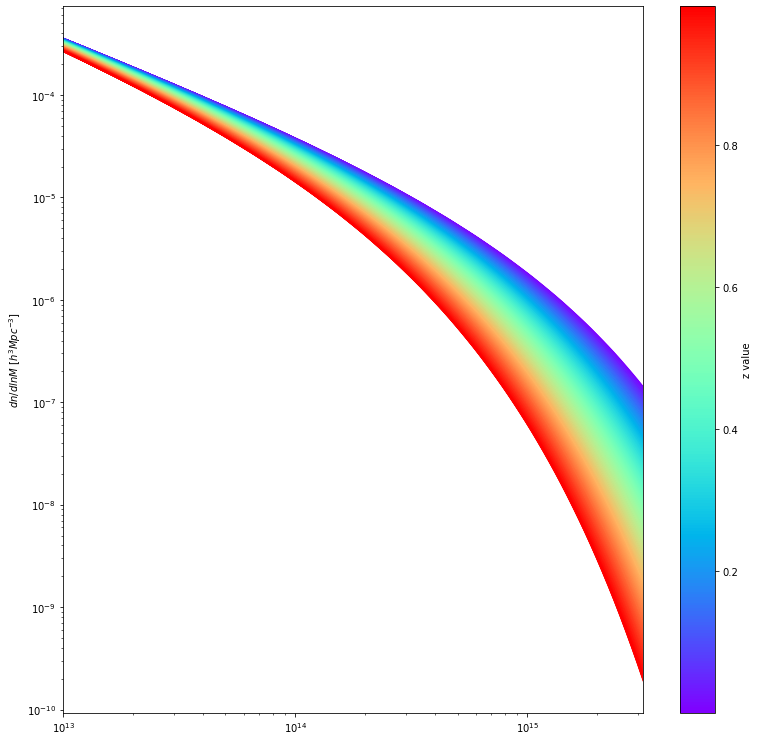

In [5]:
from matplotlib import cm
from matplotlib.cm import ScalarMappable
plt.figure(figsize=(13,13))

znum = np.random.uniform(0, 1, size=1000)
znum = sorted(znum)
# Assuming z is already defined and dndm is your function
M_values = 10**np.linspace(13, 15.5, 100)

# Define a colormap and normalize the z values
norm = plt.Normalize(min(znum), max(znum))
colormap = cm.get_cmap('rainbow')

# Plot each line with color according to z_curr
for z_curr in znum:
    color = colormap(norm(z_curr))
    plt.plot(M_values, M_values*dndm(z_curr, M_values)[0], color=color)

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$dn/dln M\ [h^3 Mpc^{-3}]$')
# Add a colorbar to show the correspondence between colors and z values
sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='z value')
plt.xlim(10**13, 10**15.5)
plt.show()

In [6]:
import matplotlib.pyplot as plt

# Generate test points (you can choose other methods for generating these)
M_test = 10**np.random.uniform(13, 17, size=50)
z_test = np.random.choice(np.linspace(0,1,25), size=10)

# Evaluate the spline at the test points
print('spline predictions')
spline_predictions = [dndm(z_val, M_val).item() for z_val in z_test for M_val in M_test]

# Evaluate the actual function at the test points
print('emulator predictions')
actual_values = [emulator.predict_dndm(cosmology, z_val, M_val) for z_val in z_test for M_val in M_test]

# Compute the fractional error
print('fractional errors')
fractional_errors = [(pred - actual) / actual for pred, actual in zip(spline_predictions, actual_values)]


spline predictions
emulator predictions
fractional errors


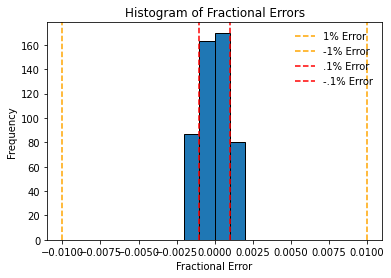

In [7]:
# Plot a histogram of the fractional errors
plt.hist(fractional_errors, bins=20, range=(-0.01, 0.01), edgecolor='black')
plt.axvline(x=0.01, color='orange', linestyle='--', label='1% Error')
plt.axvline(x=-0.01, color='orange', linestyle='--', label='-1% Error')

plt.axvline(x=0.001, color='r', linestyle='--', label='.1% Error')
plt.axvline(x=-0.001, color='r', linestyle='--', label='-.1% Error')

plt.xlabel('Fractional Error')
plt.ylabel('Frequency')
plt.title('Histogram of Fractional Errors')
plt.legend(frameon=False)


From http://background.uchicago.edu/~whu/courses/Ast448/dist_ref.pdf the comoving volume element
$$\frac{dV}{d\Omega dz} = D_H \frac{(1+z)^2 D_A^2}{E(z)}$$
Where
- $D_A$ is angular diameter disitance
- $D_H$ is the hubble distance
- $E(z)=\sqrt{\Omega_M(1+z)^3 + \Omega_k(1+z)^2 + \Omega_\Lambda}$

In [8]:
N_in_z_and_richness_bin(cosmology, 20, 40, 0.4, 0.6)

4764.934628372533

In [9]:
z_bin_edges = [0.2, 0.4, 0.6, 0.8, 1.0]
richness_bin_edges = [20, 30, 45, 60, 300]

In [10]:
N_in_z_bins_and_richness_bins(cosmology, richness_bin_edges, z_bin_edges)

100%|██████████| 4/4 [01:09<00:00, 17.34s/it]


array([[2110.54069945, 1149.31026095,  458.75321493,  591.12015484],
       [3406.06538768, 1745.34233939,  653.4242898 ,  740.81700426],
       [3710.2615276 , 1771.76973162,  616.20876738,  610.48545245],
       [3251.25958668, 1435.33156797,  460.19429783,  397.59364235]])

In [11]:
N_in_z_and_richness_bin(cosmology, 20, 30, 0.2, 0.4)

2110.540699451584

In [12]:
halo_bias = ccl.halos.HaloBiasTinker10(get_ccl_cosmology(tuple(emulator.get_cosmo_vals(cosmology))))

In [13]:
halo_bias.get_halo_bias(get_ccl_cosmology(tuple(emulator.get_cosmo_vals(cosmology))), 1e14 , 1)

1.7556891000080483